Length of list at key "stage": 365221
Length of list at key "Iteration": 365221
Length of list at key "loss_per_t": 365221
Length of list at key "diffusion_steps_t": 365221


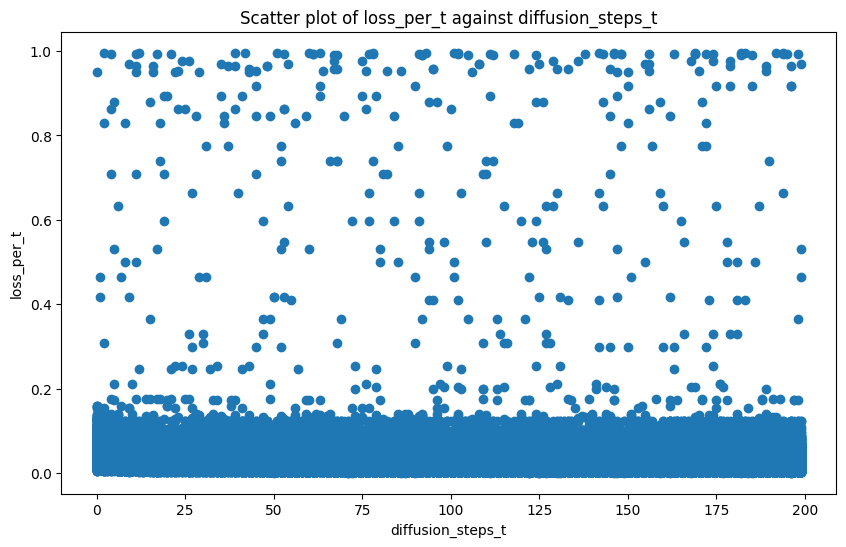

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,5)  # Set default figure size

filename = \
"/home/liranc6/ecg_forecasting/liran_project/results/icentia11k/SSSDS4/context5000_label5000/T200_beta000001_betaT002/19_17_15_07_24_ls20798o/track_t_data_table.json"
# "/home/liranc6/ecg_forecasting/liran_project/results/icentia11k/SSSDS4/context5000_label5000/T200_beta000001_betaT002/17_57_14_07_24_vo40qn9a/track_t_data_table.json"
# "/home/liranc6/ecg_forecasting/liran_project/results/icentia11k/SSSDS4/context5000_label5000/T200_beta000001_betaT002/11_42_13_07_24_13z7z5hl/track_t_data_table.json"
# "/home/liranc6/ecg_forecasting/liran_project/results/icentia11k/SSSDS4/context5000_label5000/T200_beta000001_betaT002/17_59_06_07_24_ywwhgg9f/track_t_data_table.json"
# "/home/liranc6/ecg_forecasting/liran_project/results/icentia11k/SSSDS4/context5000_label5000/T200_beta000001_betaT002/13_24_09_07_24_a6blw72n/track_t_data_table_144.json"
# "/home/liranc6/ecg_forecasting/liran_project/results/icentia11k/SSSDS4/context5000_label5000/T200_beta000001_betaT002/13_24_09_07_24_a6blw72n/track_t_data_table_1.json"

#open track_t_data_table from a file
with open(filename, 'r') as f:
    track_t_data_table = json.load(f)

# Print the lengths of the lists in the dictionary
for key, value in track_t_data_table.items():
    print(f'Length of list at key "{key}": {len(value)}')

# Remove keys with lists of size 0
track_t_data_table = {k: v for k, v in track_t_data_table.items() if len(v) != 0}

# Convert dictionary to DataFrame
df = pd.DataFrame(track_t_data_table)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['diffusion_steps_t'], df['loss_per_t'])
plt.xlabel('diffusion_steps_t')
plt.ylabel('loss_per_t')
plt.title('Scatter plot of loss_per_t against diffusion_steps_t')
plt.show()

<Figure size 3000x600 with 0 Axes>

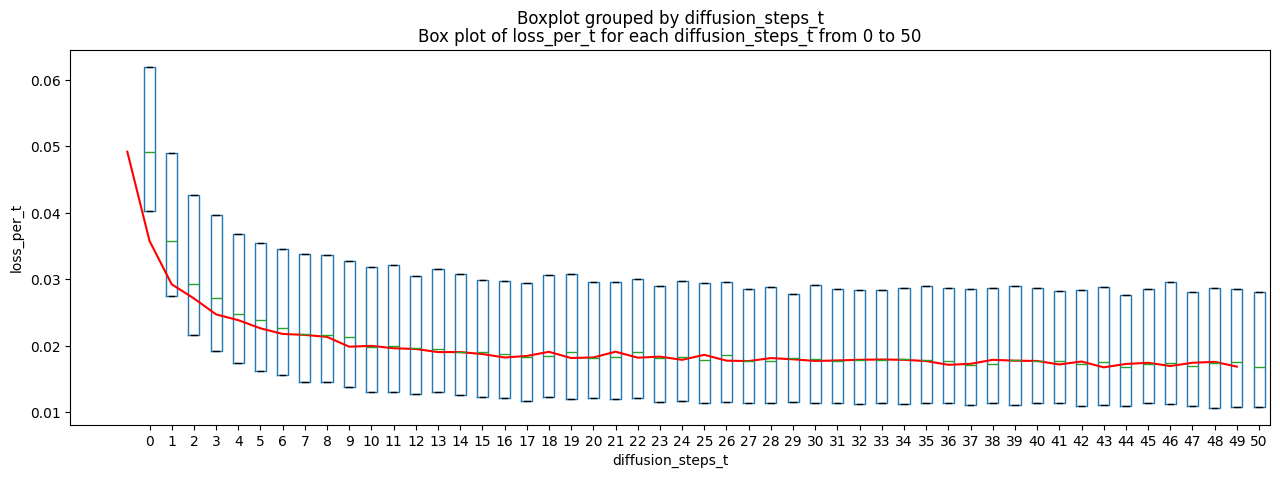

<Figure size 3000x600 with 0 Axes>

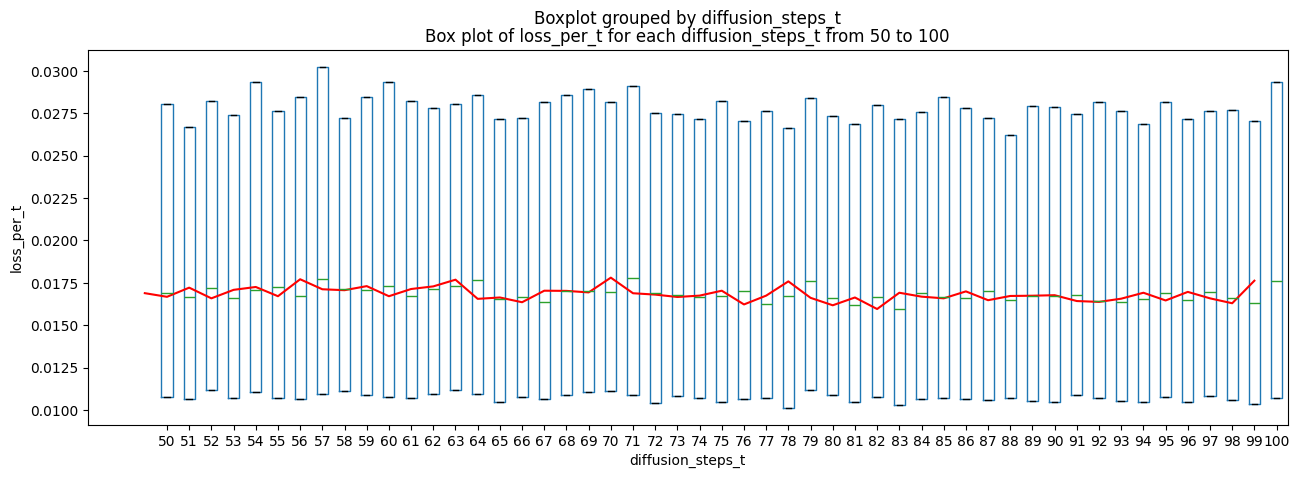

<Figure size 3000x600 with 0 Axes>

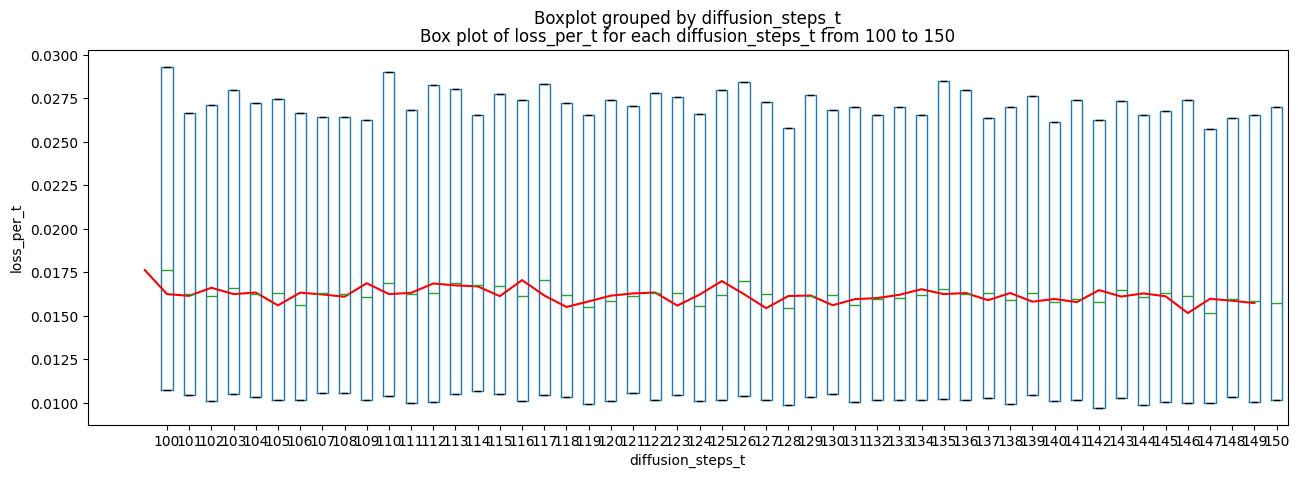

<Figure size 3000x600 with 0 Axes>

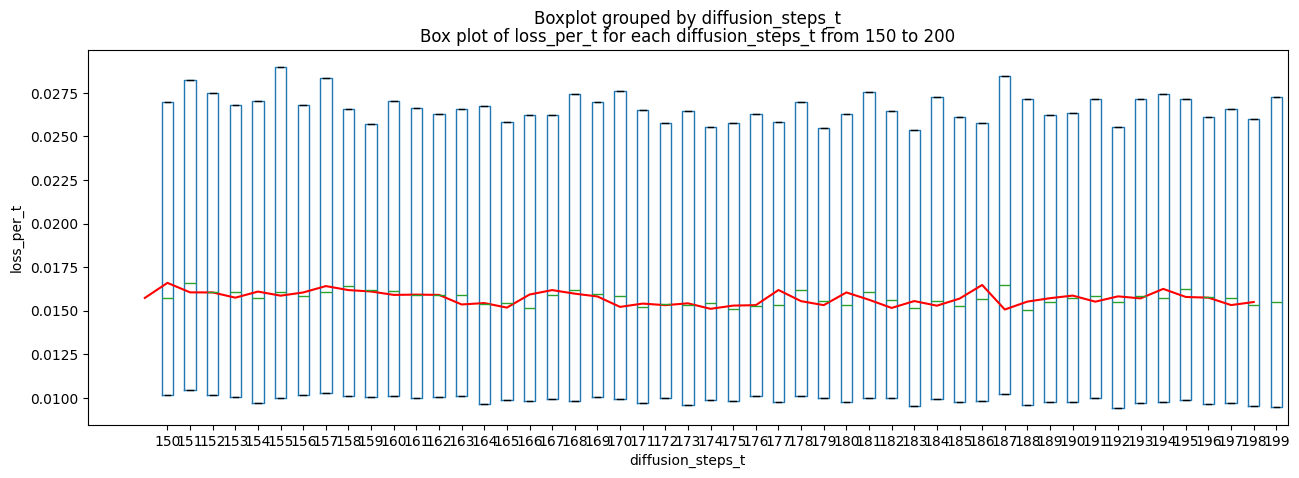

<Figure size 3000x600 with 0 Axes>

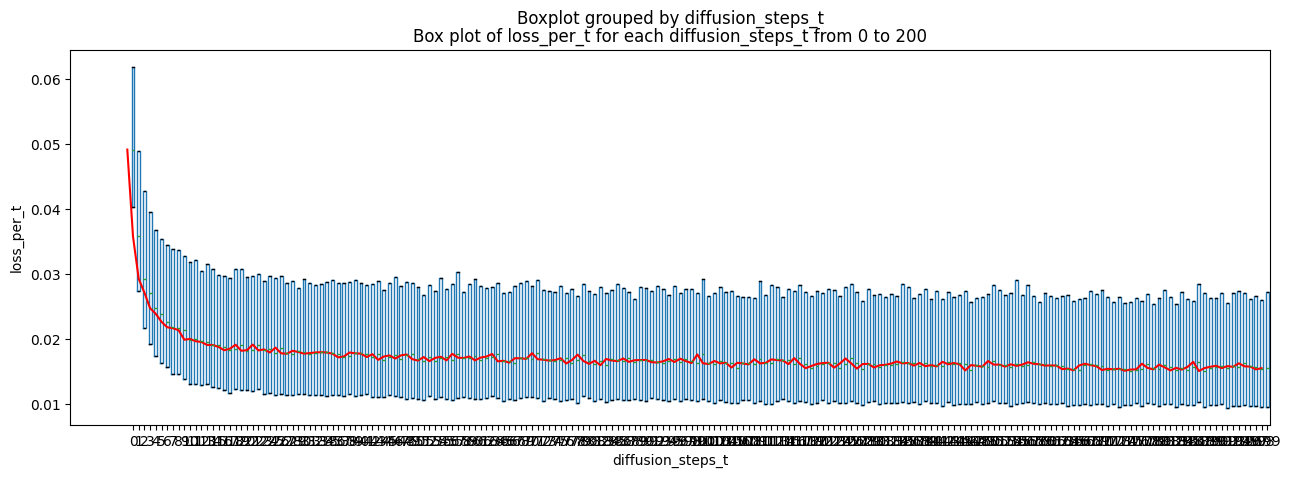

In [2]:
# Define the ranges
ranges = [(0, 50), (50, 100), (100, 150), (150, 200), (0, 200)]

# Create a box plot for each range
for start, end in ranges:
    df_filtered = df[df['diffusion_steps_t'].between(start, end)]
    plt.figure(figsize=(30, 6))  # Increase the width to 15
    boxplot = df_filtered.boxplot(column='loss_per_t', by='diffusion_steps_t', whis=0, showfliers=False, return_type='dict')
    
    # Calculate the medians and plot a line connecting them
    medians = [median.get_ydata()[0] for median in boxplot['loss_per_t']['medians']]
    plt.plot(range(len(medians)), medians, color='red')
    
    plt.xlabel('diffusion_steps_t')
    plt.ylabel('loss_per_t')
    plt.title(f'Box plot of loss_per_t for each diffusion_steps_t from {start} to {end}')
    plt.grid(False)
    plt.show()

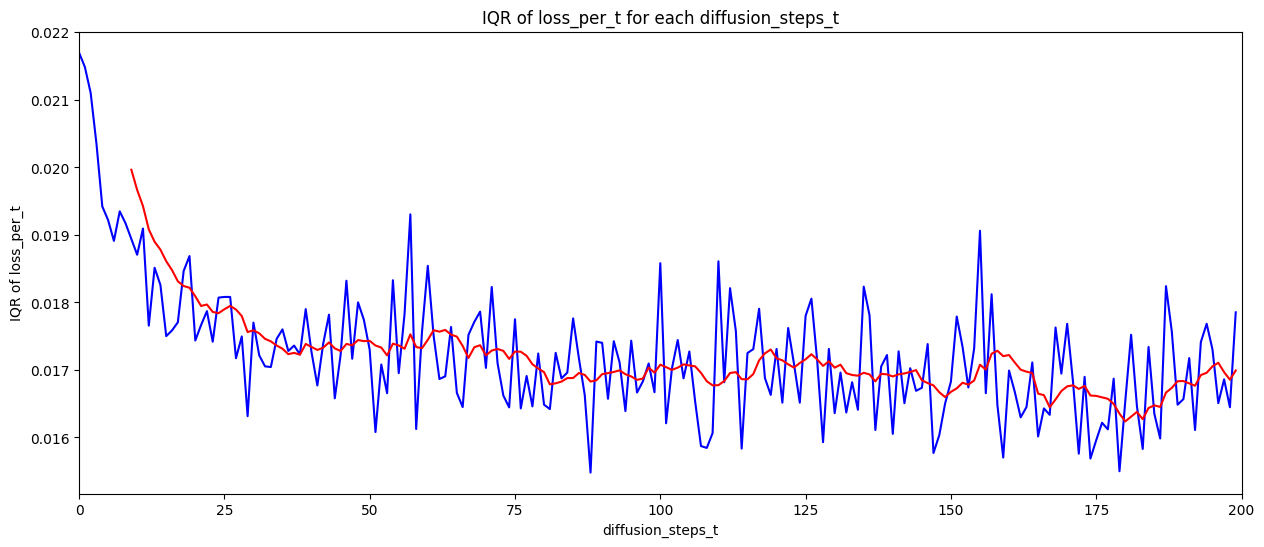

In [3]:
import pandas as pd

# Calculate the IQR for each diffusion_steps_t
df['IQR'] = df.groupby('diffusion_steps_t')['loss_per_t'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))

# Calculate EMA with a span of 10
df['IQR_EMA'] = df['IQR'].rolling(window=10).mean()

# Plot the IQR by diffusion_steps_t
plt.figure(figsize=(15, 6))

# Plot the original IQR values
df['IQR'].plot(kind='line', color='blue')

# Plot the EMA smoothed values
df['IQR_EMA'].plot(kind='line', color='red')
# Limit the x-axis from 0 to 200
plt.xlim(0, 200)

plt.xlabel('diffusion_steps_t')
plt.ylabel('IQR of loss_per_t')
plt.title('IQR of loss_per_t for each diffusion_steps_t')
plt.grid(False)
plt.show()

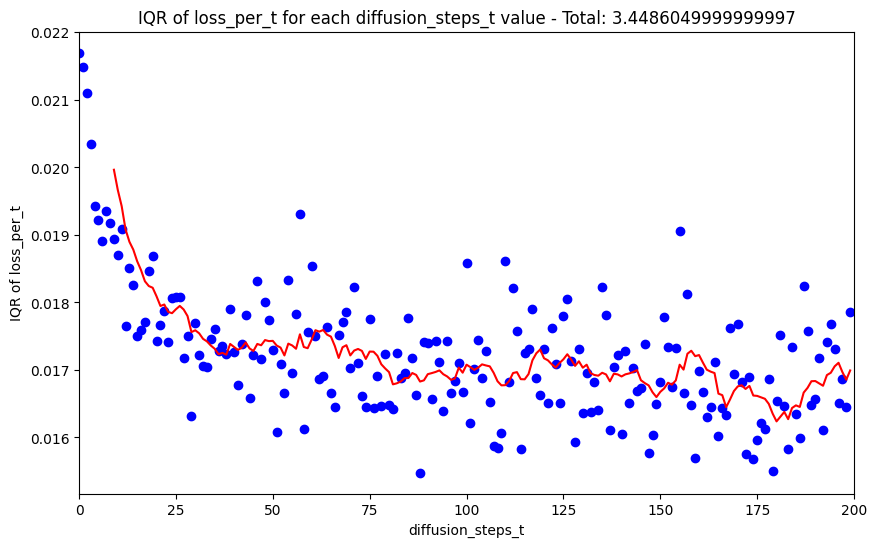

In [4]:
import seaborn as sns

# Calculate the IQR for each diffusion_steps_t
df['IQR'] = df.groupby('diffusion_steps_t')['loss_per_t'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the points in blue
df['IQR'].sort_index().plot(style='o', color='blue')

# Compute the time-weighted EMA and plot the line in red
df['IQR'].sort_index().rolling(window=10).mean().plot(style='-', color='red')

plt.xlabel('diffusion_steps_t')
plt.ylabel('IQR of loss_per_t')
plt.title('IQR of loss_per_t for each diffusion_steps_t value - Total: {}'.format(df['IQR'].sum()))

# Limit the x-axis from 0 to 200
plt.xlim(0, 200)

plt.show()

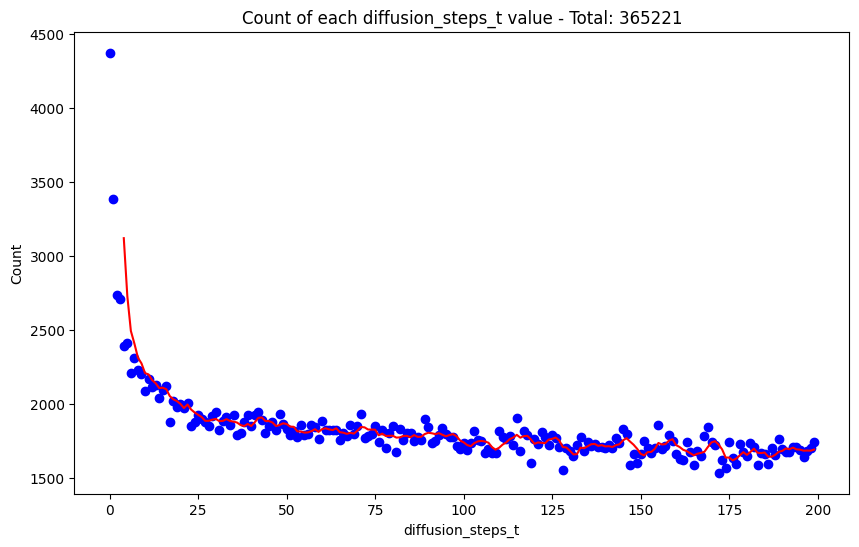

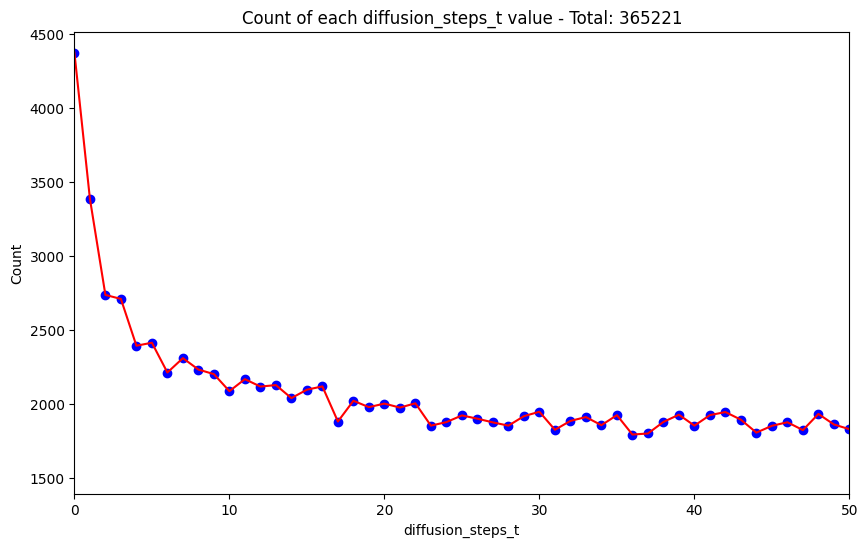

In [5]:
def plot_diffusion_steps(df, window_size=10, t_range=None):
    # Count the occurrences of each diffusion_steps_t value
    counts = df['diffusion_steps_t'].value_counts()

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot the points in blue
    counts.sort_index().plot(style='o', color='blue')

    # Compute the simple moving average and plot the line in red
    counts.sort_index().rolling(window=window_size).mean().plot(style='-', color='red')

    plt.xlabel('diffusion_steps_t')
    plt.ylabel('Count')
    plt.title('Count of each diffusion_steps_t value - Total: {}'.format(counts.sum()))

    # If a range is provided, limit the x-axis to this range
    if t_range is not None:
        plt.xlim(t_range)

    plt.show()
# Assuming df is your DataFrame with 'diffusion_steps_t' column

# To plot all values
plot_diffusion_steps(df, 5)

# To plot a specific range of values
plot_diffusion_steps(df, 1, t_range=(0, 50))